# Binary Classifier to Classify Images of Trucks & Ships

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)

In [4]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

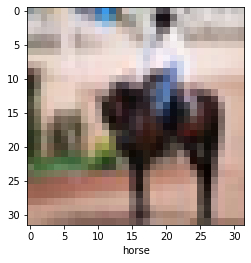

In [5]:
def show_image_cifar10(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(cifar10_classes[y[index]])
    
show_image_cifar10(x_train, y_train, 11)

## Filtering & preparing truck/ship dataset

In [6]:
st_x_train = []
st_y_train = []

for i in range(y_train.shape[0]):
    if(y_train[i] == 9 or y_train[i] == 8):
        st_x_train.append(x_train[i])
        st_y_train.append(y_train[i])
        
st_x_train = np.array(st_x_train)
st_y_train = np.array(st_y_train, dtype = int)

In [7]:
st_x_test = []
st_y_test = []

for i in range(y_test.shape[0]):
    if(y_test[i] == 9 or y_test[i] == 8):
        st_x_test.append(x_test[i])
        st_y_test.append(y_test[i])
        
st_x_test = np.array(st_x_test)
st_y_test = np.array(st_y_test, dtype = int)

In [8]:
for i in range(len(st_y_train)):
    if(st_y_train[i] == 8):
        st_y_train[i] = 0
    else:
        st_y_train[i] = 1
        
for i in range(len(st_y_test)):
    if(st_y_test[i] == 8):
        st_y_test[i] = 0
    else:
        st_y_test[i] = 1

In [9]:
st_ds_classes = ['ship', 'truck']

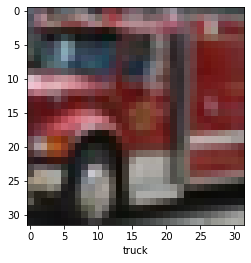

In [10]:
def show_image_st_ds(x, y, index):
    plt.imshow(x[index])
    plt.xlabel(st_ds_classes[y[index]])
    
show_image_st_ds(st_x_train, st_y_train, 14)

In [11]:
st_x_train = st_x_train/255 
st_x_test = st_x_test/255

## CNN Model

In [12]:
bc_cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(2, activation = 'softmax'),
])

In [13]:
bc_cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

## Training the model

In [14]:
bc_cnn.fit(st_x_train, st_y_train, epochs = 5)

Epoch 1/5
313/313 [==============================] - 4s 11ms/step - loss: 0.3974 - accuracy: 0.8177
Epoch 2/5
313/313 [==============================] - 4s 11ms/step - loss: 0.2560 - accuracy: 0.8963
Epoch 3/5
313/313 [==============================] - 4s 11ms/step - loss: 0.2132 - accuracy: 0.9162
Epoch 4/5
313/313 [==============================] - 3s 11ms/step - loss: 0.1869 - accuracy: 0.9261
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.1698 - accuracy: 0.9339


In [16]:
bc_cnn.evaluate(st_x_test, st_y_test)

63/63 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.9190


[0.20950329303741455, 0.9190000295639038]

## Testing the model

In [17]:
pred = bc_cnn.predict(st_x_test)
pred_result = [np.argmax(element) for element in pred]

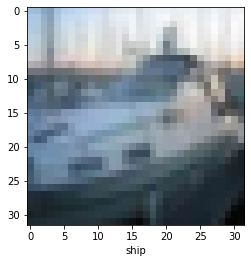

In [18]:
show_image_st_ds(st_x_test, pred_result, 1)

## Saving the model

In [19]:
tf.keras.models.save_model(bc_cnn,'bc_st_cnn_model.hdf5')